In [38]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [40]:
img=cv2.imread('Image_people.jpg')
cv2.imshow('test',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
img1=cv2.blur(img,(5,5))
img2=cv2.blur(img,(10,10))
img3=cv2.blur(img,(15,15))

In [42]:
cv2.imshow('test1',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('test2',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('test3',img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

(Text(0.5,1,'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

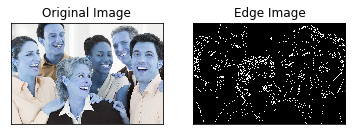

In [5]:
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


In [43]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image/255 + gauss
        return noisy
    
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        out[coords] = 0
        return out
    
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image/255 * vals) / float(vals)
        return noisy
    
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image/255 + image/255 * gauss
        return noisy

In [44]:
img4 = noisy("gauss",img)
img5 = noisy("s&p",img)
img6 = noisy("poisson",img)
img7 = noisy("speckle",img)

cv2.imshow('test4',img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('test5',img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('test6',img6)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('test7',img7)
cv2.waitKey(0)
cv2.destroyAllWindows()

